 # H20
This is an introductory notebook for people wanting to get started with H2O (the open source machine learning package by H2O.ai)
H2O is the world’s number one machine learning platform. 

It is an open-source software, and the H2O-3 GitHub repository is available for anyone to start hacking. This hands-on guide aims to explain the basic principles behind H2O and get you as a data scientist started as quickly as possible in the most simple way. The rest is just machine learning.

After reading this guide, you’ll be able to:

- Understand which basic problems H2O solves and why,
- play with H2O — explore data and create and tune models,
- see beyond the horizon. Understand where H2O can take you.

In [1]:
import h2o
import time
import seaborn
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

%matplotlib inline
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


Once the module in imported, the first step is to initialize the h2o module.

The h2o.init() command is pretty smart and does a lot of things. First, an attempt is made to search for an existing H2O instance being started already, before starting a new one. When none is found automatically or specified manually with argument available, a new instance of H2O is started.

During startup, H2O is going to print some useful information. Version of the Python it is running on, H2O’s version, how to connect to H2O’s Flow interface or where error logs reside, just to name a few.

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_181"; OpenJDK Runtime Environment (build 1.8.0_181-8u181-b13-2~deb9u1-b13); OpenJDK 64-Bit Server VM (build 25.181-b13, mixed mode)
  Starting server from /opt/conda/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpjzcq7vsd
  JVM stdout: /tmp/tmpjzcq7vsd/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpjzcq7vsd/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.4
H2O cluster version age:,5 years and 9 months !!!
H2O cluster name:,H2O_from_python_unknownUser_qlv4m5
H2O cluster total nodes:,1
H2O cluster free memory:,6.969 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


Now that the initialization is done, let us first import the dataset. The command is very similar to pandas.read_csv and the data is stored in memory as H2OFrame

H2O supports various file formats and data sources.

In [3]:
heart_df = h2o.import_file("../input/heart.csv", destination_frame="heart_df")

Parse progress: |█████████████████████████████████████████████████████████| 100%


# Data Exploration
Now, lets look out the dataset with h20 dataframe

In [4]:
heart_df.head()

﻿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
44,1,1,120,263,0,1,173,0,0,2,0,3,1
52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
heart_df.describe()

Rows:303
Cols:14




,﻿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
type,int,int,int,int,int,int,int,int,int,real,int,int,int,int
mins,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,54.36633663366333,0.6831683168316832,0.9669966996699675,131.62376237623772,246.26402640264035,0.1485148514851485,0.5280528052805283,149.6468646864687,0.32673267326732675,1.0396039603960392,1.3993399339933994,0.7293729372937293,2.313531353135314,0.5445544554455446
maxs,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.2,2.0,4.0,3.0,1.0
sigma,9.08210098983786,0.46601082333962385,1.0320524894832983,17.538142813517098,51.83075098793005,0.35619787492797644,0.525859596359298,22.905161114914087,0.4697944645223165,1.1610750220686346,0.6162261453459621,1.0226063649693276,0.6122765072781408,0.49883478416439136
zeros,0,96,143,0,0,258,147,0,204,99,21,175,2,138
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0


# Histograms for all the features 

/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:1867: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


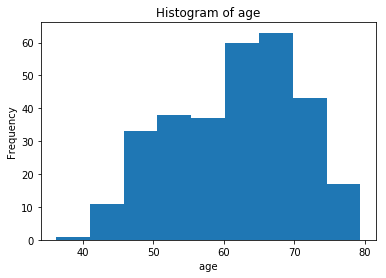

/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:1867: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


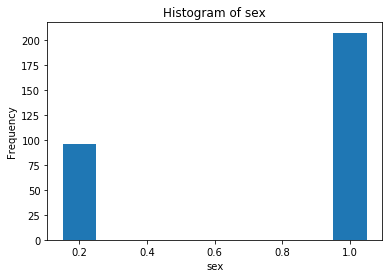

/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:1867: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


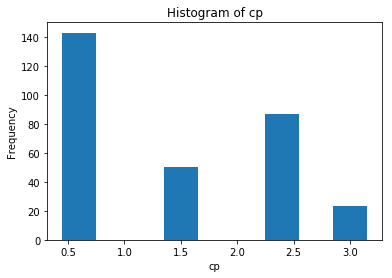

/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:1867: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


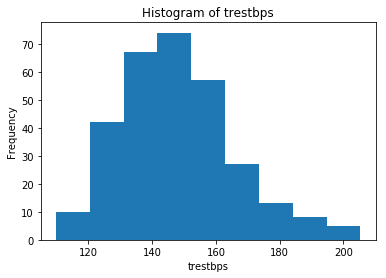

/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:1867: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


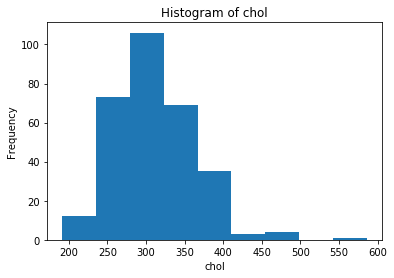

/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:1867: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


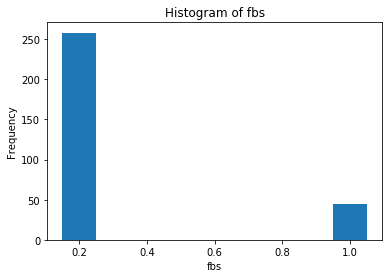

/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:1867: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


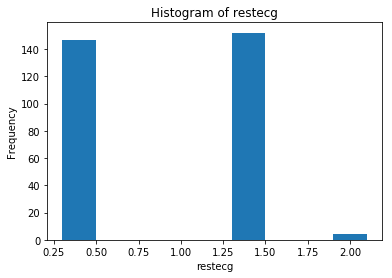

/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:1867: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


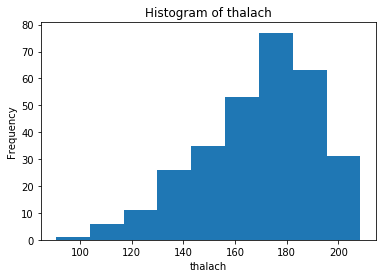

/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:1867: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


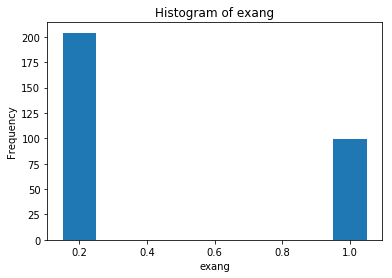

/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:1867: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


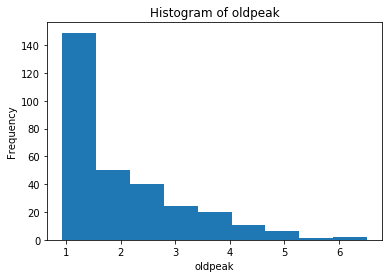

/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:1867: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


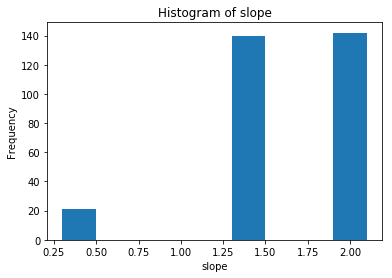

/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:1867: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


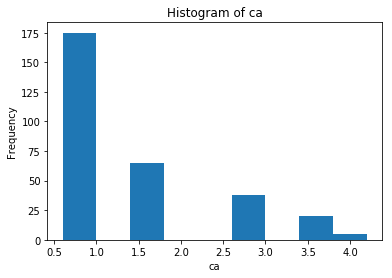

/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:1867: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


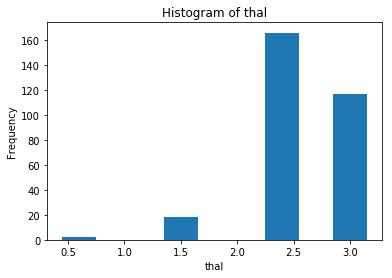

/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:1867: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


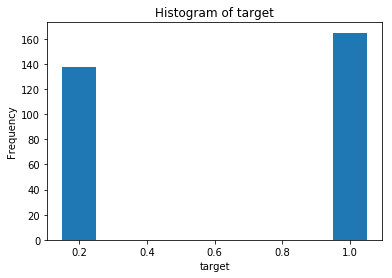

In [6]:
for col in heart_df.columns:
    heart_df[col].hist()

# Correlation Heatmap

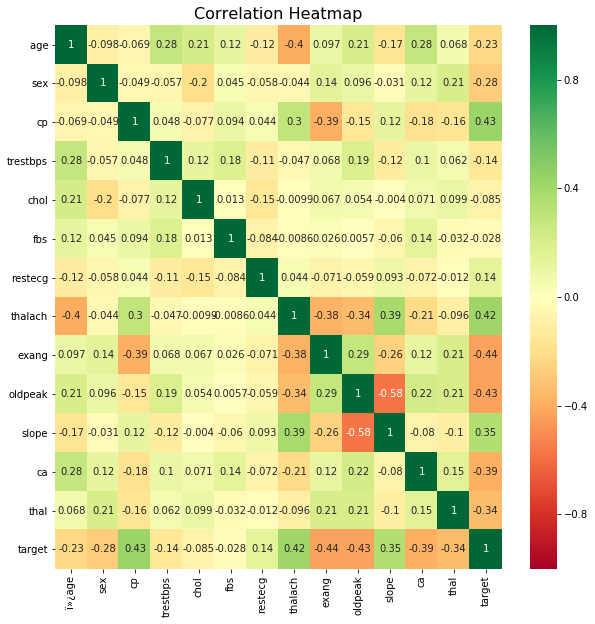

In [7]:
plt.figure(figsize=(10,10))
corr = heart_df.cor().as_data_frame()
corr.index = heart_df.columns
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Train Test validation split

Let us now split the data into three parts - train, valid and test datasets - at a ratio of 60%, 10% and 20% respectively. We could use split_frame() function for the same.

In [8]:
train, valid, test = heart_df.split_frame(ratios=[0.6,0.1], seed=1234)
response = "target"
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
test[response] = test[response].asfactor()
print("Number of rows in train, valid and test set : ", train.shape[0], valid.shape[0], test.shape[0])

Number of rows in train, valid and test set :  185 32 86


# Modeling Building

Now, let us build a baseline model using these splits. There are multiple algorithms available in the H2O module. 
First Starting with one of my favourite algo Gradient Boosting Machines

In [9]:
predictors = heart_df.columns[:-1]
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=response, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [10]:
print(gbm)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1731786719723_1


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.015019592604081191
RMSE: 0.12255444750836744
LogLoss: 0.0939217678549615
Mean Per-Class Error: 0.0
AUC: 1.0
pr_auc: 0.9904761904761905
Gini: 1.0
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6206872083065069: 


,0,1,Error,Rate
0,80.0,0.0,0.0,(0.0/80.0)
1,0.0,105.0,0.0,(0.0/105.0)
Total,80.0,105.0,0.0,(0.0/185.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.6206872,1.0,102.0
max f2,0.6206872,1.0,102.0
max f0point5,0.6206872,1.0,102.0
max accuracy,0.6206872,1.0,102.0
max precision,0.9943294,1.0,0.0
max recall,0.6206872,1.0,102.0
max specificity,0.9943294,1.0,0.0
max absolute_mcc,0.6206872,1.0,102.0
max min_per_class_accuracy,0.6206872,1.0,102.0
max mean_per_class_accuracy,0.6206872,1.0,102.0


Gains/Lift Table: Avg response rate: 56.76 %, avg score: 56.75 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0162162,0.9939246,1.7619048,1.7619048,1.0,0.9940595,1.0,0.9940595,0.0285714,0.0285714,76.1904762,76.1904762
,2,0.0216216,0.9920876,1.7619048,1.7619048,1.0,0.9935224,1.0,0.9939252,0.0095238,0.0380952,76.1904762,76.1904762
,3,0.0324324,0.9910855,1.7619048,1.7619048,1.0,0.9913786,1.0,0.9930764,0.0190476,0.0571429,76.1904762,76.1904762
,4,0.0432432,0.9906699,1.7619048,1.7619048,1.0,0.9908432,1.0,0.9925181,0.0190476,0.0761905,76.1904762,76.1904762
,5,0.0540541,0.9897086,1.7619048,1.7619048,1.0,0.9901017,1.0,0.9920348,0.0190476,0.0952381,76.1904762,76.1904762
,6,0.1027027,0.9840288,1.7619048,1.7619048,1.0,0.9869992,1.0,0.9896495,0.0857143,0.1809524,76.1904762,76.1904762
,7,0.1513514,0.9785795,1.7619048,1.7619048,1.0,0.9814336,1.0,0.9870087,0.0857143,0.2666667,76.1904762,76.1904762
,8,0.2,0.9682271,1.7619048,1.7619048,1.0,0.9740732,1.0,0.9838622,0.0857143,0.3523810,76.1904762,76.1904762
,9,0.3027027,0.9481295,1.7619048,1.7619048,1.0,0.9579325,1.0,0.9750646,0.1809524,0.5333333,76.1904762,76.1904762
,10,0.4,0.9151543,1.7619048,1.7619048,1.0,0.9348482,1.0,0.9652823,0.1714286,0.7047619,76.1904762,76.1904762



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
,2024-11-16 19:52:11,0.032 sec,0.0,0.4954136,0.6839884,0.5,0.0,1.0,0.4324324
,2024-11-16 19:52:11,0.233 sec,1.0,0.4671036,0.6284551,0.9324405,0.5801605,1.7619048,0.1459459
,2024-11-16 19:52:11,0.263 sec,2.0,0.4420753,0.5816058,0.9448810,0.9308608,1.7619048,0.1351351
,2024-11-16 19:52:11,0.286 sec,3.0,0.4191787,0.5400703,0.9530952,0.9377354,1.7619048,0.1189189
,2024-11-16 19:52:11,0.305 sec,4.0,0.4001189,0.5064497,0.9641667,0.9653604,1.7619048,0.1027027
---,---,---,---,---,---,---,---,---,---
,2024-11-16 19:52:11,0.866 sec,46.0,0.1325552,0.1034881,0.9998810,0.9903859,1.7619048,0.0054054
,2024-11-16 19:52:11,0.875 sec,47.0,0.1301770,0.1005399,1.0,0.9904762,1.7619048,0.0
,2024-11-16 19:52:12,0.883 sec,48.0,0.1282831,0.0987821,0.9998810,0.9903859,1.7619048,0.0054054
,2024-11-16 19:52:12,0.894 sec,49.0,0.1253304,0.0963466,1.0,0.9904762,1.7619048,0.0



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
cp,49.7725296,1.0,0.2342191
ca,35.6740952,0.7167427,0.1678749
﻿age,24.6013737,0.4942761,0.1157689
thal,24.5945969,0.4941400,0.1157370
oldpeak,20.6189556,0.4142638,0.0970285
chol,14.6140299,0.2936164,0.0687706
trestbps,13.2631454,0.2664752,0.0624136
thalach,12.5052586,0.2512482,0.0588471
sex,7.9364138,0.1594537,0.0373471
restecg,4.2353444,0.0850940,0.0199306


Now that is quite a bit of information. We can look at them individually.

1. First, we get the name of the model and a key to acces the model ( key is not much useful for us I guess )
2. Error metrics on the train data like log-loss, mean per class error, AUC, Gini, MSE, RMSE
3. Confusion matrix for max F1 threshold
4. Threshold values for different metrics
5. Gains / Lift table
6. Scoring history - information on how the metrics changed in each of the epochs
7. Feature importance
Okay. I heard you. How can we use the metrics of train set (as we actually trained on this dataset). We need to evaluate them from the valid set. We can use the model_performance() function for the same. We can then print the metrics.

In [11]:
perf = gbm.model_performance(valid)
print(perf)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1336486752877018
RMSE: 0.36557991641732973
LogLoss: 0.4664779135599224
Mean Per-Class Error: 0.15625
AUC: 0.875
pr_auc: 0.8374431029510676
Gini: 0.75
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2657951768076915: 


,0,1,Error,Rate
0,12.0,4.0,0.25,(4.0/16.0)
1,1.0,15.0,0.0625,(1.0/16.0)
Total,13.0,19.0,0.1562,(5.0/32.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2657952,0.8571429,18.0
max f2,0.2657952,0.9036145,18.0
max f0point5,0.6734153,0.8552632,14.0
max accuracy,0.6734153,0.84375,14.0
max precision,0.9913538,1.0,0.0
max recall,0.0098004,1.0,31.0
max specificity,0.9913538,1.0,0.0
max absolute_mcc,0.2657952,0.6999132,18.0
max min_per_class_accuracy,0.6734153,0.8125,14.0
max mean_per_class_accuracy,0.6734153,0.84375,14.0


Gains/Lift Table: Avg response rate: 50.00 %, avg score: 49.52 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.03125,0.9912427,2.0,2.0,1.0,0.9913538,1.0,0.9913538,0.0625,0.0625,100.0,100.0
,2,0.03125,0.9911315,0.0,2.0,0.0,0.0,1.0,0.9913538,0.0,0.0625,-100.0,100.0
,3,0.03125,0.9910204,0.0,2.0,0.0,0.0,1.0,0.9913538,0.0,0.0625,-100.0,100.0
,4,0.0625,0.9909854,2.0,2.0,1.0,0.9909953,1.0,0.9911746,0.0625,0.125,100.0,100.0
,5,0.0625,0.9909726,0.0,2.0,0.0,0.0,1.0,0.9911746,0.0,0.125,-100.0,100.0
,6,0.125,0.9896926,2.0,2.0,1.0,0.9904467,1.0,0.9908106,0.125,0.25,100.0,100.0
,7,0.15625,0.9859748,2.0,2.0,1.0,0.9874731,1.0,0.9901431,0.0625,0.3125,100.0,100.0
,8,0.21875,0.9520611,2.0,2.0,1.0,0.9728939,1.0,0.9852148,0.125,0.4375,100.0,100.0
,9,0.3125,0.8689640,1.3333333,1.8,0.6666667,0.9034070,0.9,0.9606724,0.125,0.5625,33.3333333,80.0
,10,0.40625,0.7112835,1.3333333,1.6923077,0.6666667,0.7740189,0.8461538,0.9175986,0.125,0.6875,33.3333333,69.2307692


So using our baseline model, we are getting about 0.87 auc in valid set and 0.1 auc in train set. Similarly, log loss is 0.466 in valid set and 0.093 in train set.

Now we can use the validation set to tune our parameters. We can use the early stopping to find the number of iterations to train similar to other GBM implementations. We can set some random values for the parameters to start with. 

Please note that, we have added a new validation_frame parameter in this one compared to the previous one while training.

# Model Tuning

In [12]:
gbm_tune = H2OGradientBoostingEstimator(
    ntrees = 1000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    col_sample_rate = 0.7,
    sample_rate = 0.7,
    seed = 1234
)      
gbm_tune.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


Now, Lets check out the performance of tuned model

In [13]:
gbm_tune.model_performance(valid).auc()

0.9140625

!! Great we have achieved AUC of 0.91 which is satisfactory

# Grid Search

In [14]:
from h2o.grid.grid_search import H2OGridSearch

gbm_grid = H2OGradientBoostingEstimator(
    ntrees = 1000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    col_sample_rate = 0.7,
    sample_rate = 0.7,
    seed = 1234
) 

hyper_params = {'max_depth':[4,6,8,10,12]}
grid = H2OGridSearch(gbm_grid, hyper_params,
                         grid_id='depth_grid',
                         search_criteria={'strategy': "Cartesian"})
#Train grid search
grid.train(x=predictors, 
           y=response,
           training_frame=train,
           validation_frame=valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [15]:
print(grid)

    max_depth           model_ids             logloss
0          10  depth_grid_model_4  0.5373946106921493
1           8  depth_grid_model_3  0.5373946106921493
2           6  depth_grid_model_2  0.5373946106921493
3          12  depth_grid_model_5  0.5373946106921493
4           4  depth_grid_model_1  0.5378250211341893



As we can see this has printed the log loss performance at various depths. If we want to look at the validation AUC, then we can use the following.

In [16]:
sorted_grid = grid.get_grid(sort_by='auc',decreasing=True)
print(sorted_grid)

    max_depth           model_ids         auc
0           4  depth_grid_model_1  0.91796875
1          10  depth_grid_model_4   0.9140625
2           8  depth_grid_model_3   0.9140625
3           6  depth_grid_model_2   0.9140625
4          12  depth_grid_model_5   0.9140625



At max_depth of 4 maximum auc is achieved which is 0.917968 

Interestingly, there is not much change in the AUC for the top two results. Since we train on a very small sample, we might be getting this.

Also please note that, we just searched for the max_depth parameter. Please do a more comprehensive search for better results. Please refer to this [notebook](https://github.com/h2oai/h2o-3/blob/master/h2o-docs/src/product/tutorials/gbm/gbmTuning.ipynb) for more comprehensive details on finetuning.

## K-Fold cross validation:

Most of the times, we will just do K-fold cross valdiation. So now let us do the same using H2O. Just setting the nfolds parameter in the model will do the k-fold cross validation.

In [17]:
cv_gbm = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.05,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    nfolds=4, 
    seed=2018)
cv_gbm.train(x = predictors, y = response, training_frame = train, validation_frame=valid)
cv_summary = cv_gbm.cross_validation_metrics_summary().as_data_frame()
cv_summary

gbm Model Build progress: |███████████████████████████████████████████████| 100%


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid
0,accuracy,0.838469,0.018592477,0.87234044,0.8235294,0.85365856,0.8043478
1,auc,0.8643752,0.024303041,0.9097744,0.863354,0.8132184,0.87115383
2,err,0.16153096,0.018592477,0.12765957,0.1764706,0.14634146,0.19565217
3,err_count,7.5,1.0606601,6.0,9.0,6.0,9.0
4,f0point5,0.84057343,0.04063255,0.8783784,0.859375,0.88235295,0.7421875
5,f1,0.85881275,0.0284391,0.8965517,0.8301887,0.9,0.80851066
6,f2,0.88115764,0.03303302,0.91549295,0.8029197,0.9183673,0.88785046
7,lift_top_group,1.8034483,0.22757204,1.6785715,1.8214285,1.4137931,2.3
8,logloss,0.4960855,0.07403843,0.38669455,0.667273,0.48352513,0.44684923
9,max_per_class_error,0.2664594,0.038766738,0.21052632,0.21428572,0.33333334,0.30769232


In [18]:
cv_gbm.model_performance(valid).auc()

0.87109375

# H20 with XGBoost

In [19]:
from h2o.estimators import H2OXGBoostEstimator

cv_xgb = H2OXGBoostEstimator(
    ntrees = 1000,
    learn_rate = 0.05,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    nfolds=4, 
    seed=2018)
cv_xgb.train(x = predictors, y = response, training_frame = train, validation_frame=valid)
cv_xgb.model_performance(valid).auc()

xgboost Model Build progress: |███████████████████████████████████████████| 100%


0.890625

There is a improvement of 2 percent in comparison of GBM that's great

# feature importance
feature importance is inbuilt with xgboost model to see what are the contribution features in heart disease prediction with XGboost.

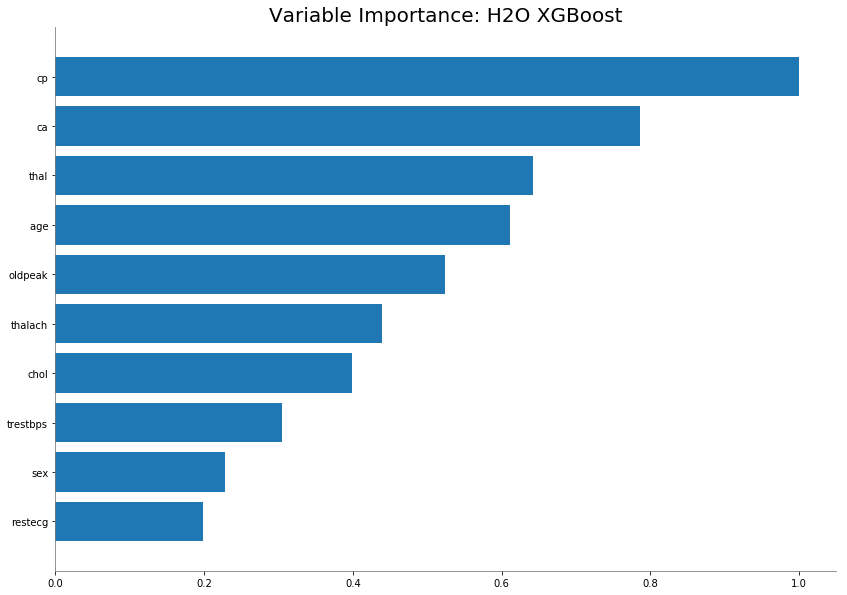

In [20]:
cv_xgb.varimp_plot()

# AutoML : Automatic Machine Learning:



H2O’s AutoML can be used for automating the machine learning workflow, which includes automatic training and tuning of many models within a user-specified time-limit. Stacked Ensembles will be automatically trained on collections of individual models to produce highly predictive ensemble models which, in most cases, will be the top performing models in the AutoML Leaderboard.

So let us use the H2OAutoML function to do automatic machine learning. We can specify the max_models parameter which indicates the number of individual (or "base") models, and does not include the two ensemble models that are trained at the end.

In [21]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models = 10, max_runtime_secs=100, seed = 1)
aml.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

AutoML progress: |████████████████████████████████████████████████████████| 100%


now lets look out the auto ml leader board

In [22]:
lb = aml.leaderboard
lb

model_id,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_20241116_195231,0.899167,0.398868,0.186607,0.355013,0.126034
XGBoost_2_AutoML_20241116_195231,0.895119,0.428728,0.19256,0.366966,0.134664
GLM_grid_1_AutoML_20241116_195231_model_1,0.885357,0.424541,0.183929,0.370201,0.137049
GBM_2_AutoML_20241116_195231,0.884524,0.420397,0.194345,0.36822,0.135586
GBM_4_AutoML_20241116_195231,0.88369,0.422709,0.183631,0.369373,0.136436
GBM_3_AutoML_20241116_195231,0.882381,0.425424,0.183631,0.370959,0.13761
StackedEnsemble_AllModels_AutoML_20241116_195231,0.88119,0.425714,0.174107,0.366655,0.134436
StackedEnsemble_BestOfFamily_AutoML_20241116_195231,0.879286,0.425334,0.202083,0.366843,0.134573
GBM_1_AutoML_20241116_195231,0.876429,0.454258,0.180655,0.379555,0.144062
XGBoost_3_AutoML_20241116_195231,0.87625,0.525554,0.160417,0.413195,0.17073


As we can see XGboost AutoML is the top contributor.

Please hit **Upvote** if you like the introductory kernel of H20.Please share your valuable feedback.